In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np


In [2]:
time = pd.read_csv("delivery_time.csv")
time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
time=time.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
time

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
time.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


C:\Users\saich\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

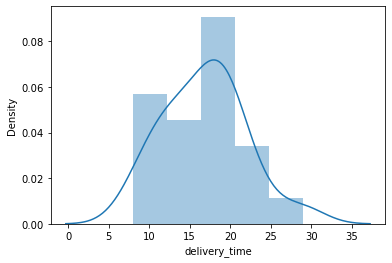

In [5]:
sns.distplot(time['delivery_time'])

C:\Users\saich\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

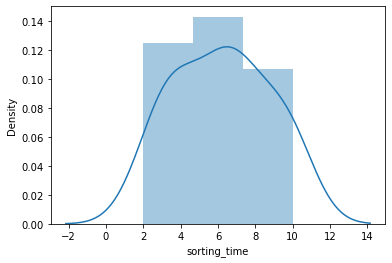

In [6]:
sns.distplot(time['sorting_time'])

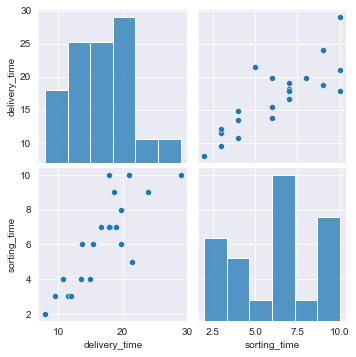

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(time)

In [8]:
import statsmodels.formula.api as smf
model = smf.ols("delivery_time~sorting_time",data = time).fit()

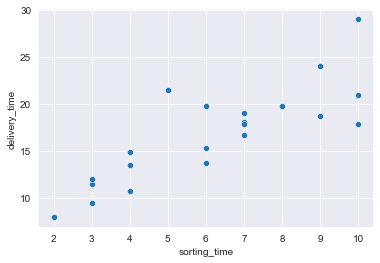

In [9]:
sns.scatterplot(x="sorting_time", y="delivery_time", data=time);

# Creating Model


In [10]:
import statsmodels.formula.api as smf 
model = smf.ols('delivery_time~sorting_time',data=time).fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           3.98e-06
Time:                        10:30:01   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model.rsquared

0.6822714748417231

In [13]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [14]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [15]:
model.tvalues,model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

# Prediction

In [16]:
# Manual prediction for say sorting time 5 by equation of linear reg
delivery_time=( 6.582734)+( 1.649020)*5
delivery_time

14.827834

In [17]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [18]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [19]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

# By using log transformation

In [20]:
import numpy as np
time1 = np.log(time)
time1

,delivery_time,sorting_time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


In [21]:
time1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [22]:
time1.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.878727
sorting_time,0.878727,1.000000


In [23]:
import statsmodels.formula.api as smf
model = smf.ols("delivery_time~sorting_time",data = time1).fit()

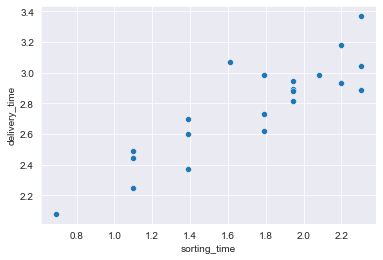

In [24]:
sns.scatterplot(x="sorting_time", y="delivery_time", data=time1);

In [25]:
model.params

Intercept       1.741987
sorting_time    0.597522
dtype: float64

In [26]:
model.tvalues,model.pvalues

(Intercept       13.085552
 sorting_time     8.024484
 dtype: float64,
 Intercept       5.921137e-11
 sorting_time    1.601539e-07
 dtype: float64)

In [27]:
(model.rsquared,model.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

# By using Square root transformation

In [28]:
time2=np.sqrt(time)
time2

,delivery_time,sorting_time
0,4.582576,3.162278
1,3.674235,2.000000
2,4.444097,2.449490
3,4.898979,3.000000
4,5.385165,3.162278
5,3.917908,2.449490
6,4.358899,2.645751
7,3.082207,1.732051
8,4.230839,3.162278
9,4.330127,3.000000


In [29]:
time2.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.853933
sorting_time,0.853933,1.000000


In [30]:
import statsmodels.formula.api as smf
model = smf.ols("delivery_time~sorting_time",data = time2).fit()

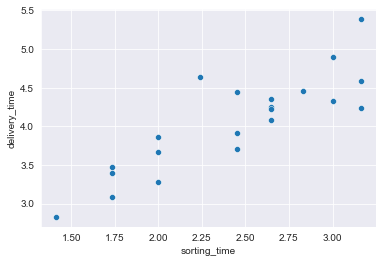

In [31]:
sns.scatterplot(x="sorting_time", y="delivery_time", data=time2);

In [32]:
model.params

Intercept       1.613479
sorting_time    1.002217
dtype: float64

In [33]:
model.tvalues,model.pvalues

(Intercept       4.628248
 sorting_time    7.152817
 dtype: float64,
 Intercept       1.833621e-04
 sorting_time    8.475706e-07
 dtype: float64)

In [34]:
(model.rsquared,model.rsquared_adj)

(0.7292011987544665, 0.7149486302678596)

# By using Cube Root Transformation

In [35]:
time3=np.cbrt(time)
time3

,delivery_time,sorting_time
0,2.758924,2.154435
1,2.381102,1.587401
2,2.703060,1.817121
3,2.884499,2.080084
4,3.072317,2.154435
5,2.485246,1.817121
6,2.668402,1.912931
7,2.117912,1.442250
8,2.615879,2.154435
9,2.656646,2.080084


In [36]:
time3.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.862622
sorting_time,0.862622,1.000000


In [37]:
import statsmodels.formula.api as smf
model = smf.ols("delivery_time~sorting_time",data = time3).fit()

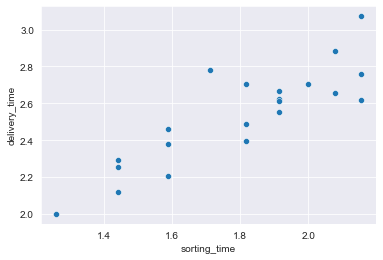

In [38]:
sns.scatterplot(x="sorting_time", y="delivery_time", data=time3);

In [39]:
model.params

Intercept       1.013571
sorting_time    0.845585
dtype: float64

In [40]:
model.tvalues,model.pvalues

(Intercept       4.900067
 sorting_time    7.433210
 dtype: float64,
 Intercept       9.941770e-05
 sorting_time    4.904127e-07
 dtype: float64)

In [41]:
(model.rsquared,model.rsquared_adj)

(0.7441167577566272, 0.7306492186911866)